In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [33]:
df = pd.read_csv('datos/soci_econ_country_profiles_v7.csv', index_col=0)
df.head()

,Region,GDP_per_capita,Employment_Agriculture,Employment_Services,Agricultural_production_index,Urban_population,Urban_population_growth_rate,Fertility_rate_total,Infant_mortality_rate,Seats_held_by_women_in_national_parliaments,Individuals_using_the_Internet,Energy_production_primary,Energy_supply_per_capita,Quality_Of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Property_price_to_income_ratio,Traffic_commute_time_index,Pollution_index,Climate_index,Affordability_Index,Cost_Of_Living_Index,Consumer_price_index,Current_health_expenditure,Human_capital_index,Inflation_consumer_prices,Life_expectancy_at_birth_total,Labour_force_participation,Pop_using_improved_drinking_water_urban,Pop_using_improved_drinking_water_rural,Population_age_distribution_0_14,Population_age_distribution_60_mas,Education_Secondary_gross_enrol_ratio,Education_Tertiary_gross_enrol_ratio
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,1.84,-0.431499,-0.793293,0.635685,0.451515,1.176545,-0.146278,0.816818,0.390527,1.373669,-0.170271,-0.433123,-0.072257,139.59,-0.480096,-1.843490,0.739348,0.085614,0.253993,0.085118,1.031920,-1.242902,-0.124619,-0.375346,0.595817,-0.661735,-0.179334,-0.356054,0.526225,0.213117,0.576120,0.983668,-0.481642,0.119029,0.928674
Australia,2.30,1.358804,-0.729591,0.874487,-0.051041,1.039907,0.271660,0.093270,-0.510644,0.436646,1.674834,0.729295,0.579071,176.54,1.024540,-0.270524,0.839394,-0.461542,-0.207625,-1.254411,0.556493,0.080872,1.230619,-0.300239,0.626171,1.061166,-0.270570,1.069555,0.052782,0.675804,0.681506,-0.044663,0.256053,1.643795,1.272043
Austria,2.30,1.006731,-0.547584,0.365043,-0.239499,-0.292313,-0.647804,-0.811165,-0.565818,0.611189,-0.538225,0.186268,0.579071,190.37,0.807519,1.532822,1.540764,-0.380339,-1.420448,-1.379278,0.273045,0.414798,0.789648,-0.345498,1.068892,0.971432,-0.238703,0.870393,-0.574209,0.675804,0.681506,-0.898700,0.796151,-0.222299,0.863591
Belarus,1.84,-0.860425,-0.101668,-0.534443,0.639974,0.316865,-0.982155,-0.449391,-0.538231,0.969463,-0.786194,-0.119185,0.513938,119.23,-1.239326,1.298550,-1.318426,1.373269,-1.221178,-0.552731,-0.845325,-1.397939,-1.028272,1.151509,-0.593477,-0.907608,0.710551,-0.877799,-0.318294,-0.042578,0.383944,-0.445537,0.295572,0.131486,1.157587
Belgium,2.30,0.819859,-0.866096,0.993887,-0.239499,1.523832,-0.564217,-0.087617,-0.547427,1.290990,-0.754198,0.508691,0.579071,160.52,0.647171,-0.433191,1.331195,-0.902361,0.011715,-0.120354,0.619511,1.070722,0.974914,-0.368860,1.047345,0.648387,-0.227962,0.835214,-1.457115,0.614924,0.644311,-0.375820,0.730285,3.118732,0.569595


In [34]:
# separamos los datos en X (VP) y y (VR)

X = df.drop(['Quality_Of_Life_Index'], axis=1)
y = df ['Quality_Of_Life_Index']

In [35]:
# dividimos los datos en datos de entrenamiento y datos de prueba

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [36]:
# ajustamos el modelo

lr = LinearRegression(n_jobs=1)
lr.fit(x_train, y_train)

LinearRegression(n_jobs=1)

In [37]:
# hacemos las predicciones

y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [38]:
# creamos un dataframe con los datos de los resultados de entrenamiento y los datos de los resultados del test

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)

In [39]:
# creamos una columna de los residuos: la diferencia entre los datos reales y los datos de la prediccion

resultados['residuos'] = resultados['Real'] - resultados['Predicted']

In [41]:
# examinamos los resultados del modelo

resultados

,Real,Predicted,Set,residuos
country,,,,
Romania,143.04,143.039544,Train,0.000456
Egypt,91.81,91.811547,Train,-0.001547
New Zealand,184.74,184.738511,Train,0.001489
Belgium,160.52,160.524277,Train,-0.004277
Vietnam,36.12,36.119316,Train,0.000684
Colombia,115.38,115.382583,Train,-0.002583
Lithuania,130.28,130.278986,Train,0.001014
Sweden,172.74,172.735254,Train,0.004746
Germany,189.74,189.748143,Train,-0.008143


In [42]:
# hacemos el cross validation

cv_scores = cross_val_score(estimator = LinearRegression(), 
                            X = X, 
                            y = y, 
                            scoring = 'neg_root_mean_squared_error', 
                            cv = 10)

In [44]:
# sacamos la media de los resultados de cross validation

cv_scores.mean()

-0.008862110217977703

Podemos ver que nuestro modelo es muy preciso con muy poco error.

In [50]:
# hacemos otro cross validation

cv_scores = cross_validate(estimator = LinearRegression(), 
                           X = X, 
                           y = y, 
                           scoring = ('r2', 'neg_root_mean_squared_error'),
                           cv = 10)                           

In [51]:
cv_scores["test_r2"].mean()

0.999999933939948

In [52]:
cv_scores["test_neg_root_mean_squared_error"].mean()

-0.008862110217977703

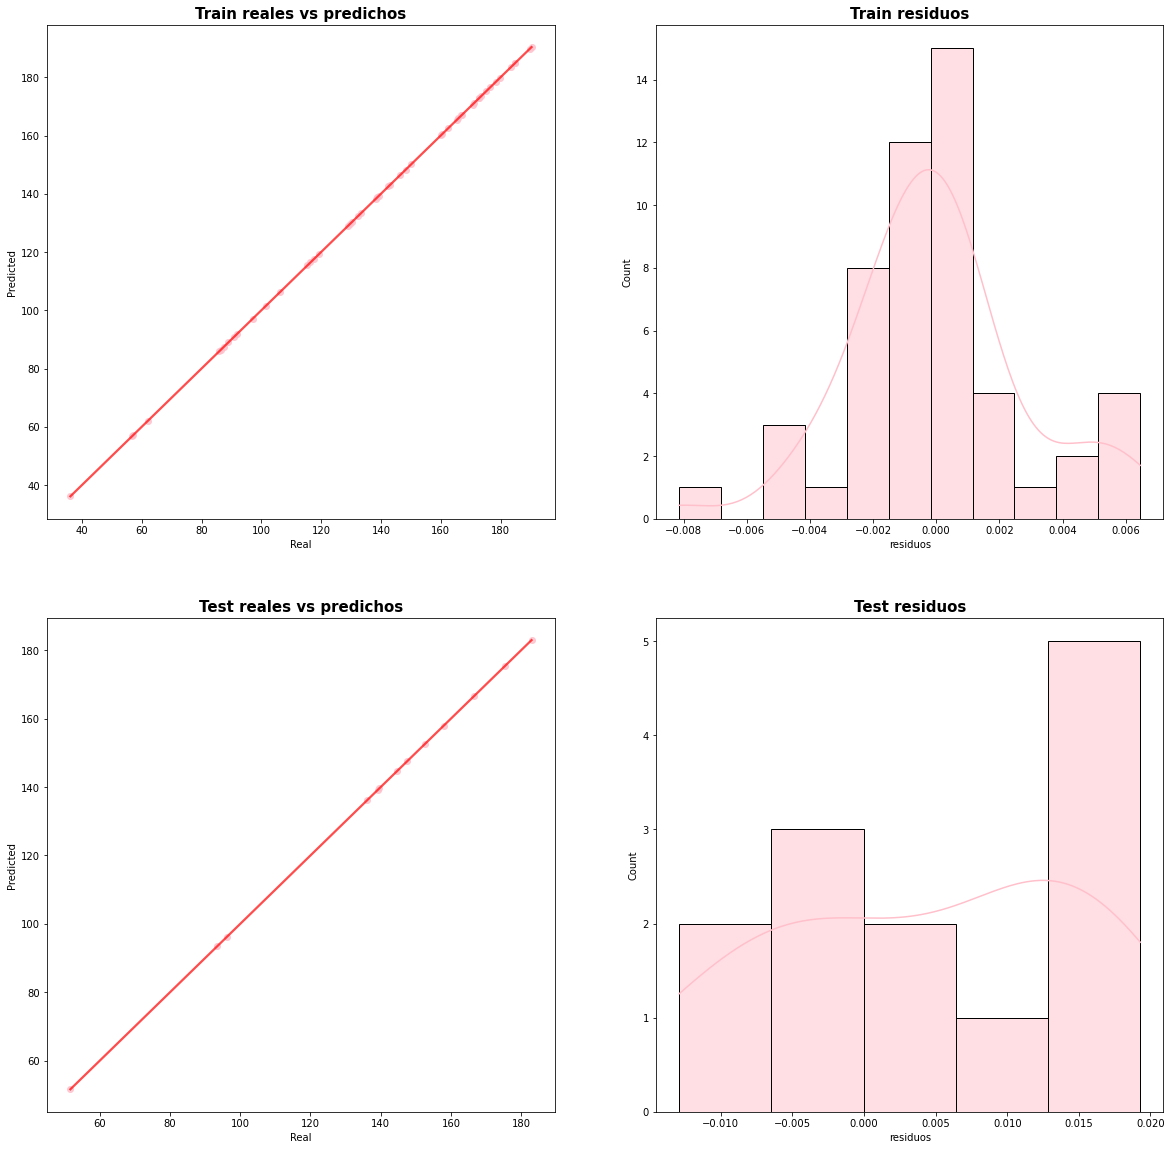

In [53]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "pink",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "pink",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="pink",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "pink",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");